In [87]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

In [88]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device
seed =1234

In [89]:
#Create a straight line data set with 100 points to given parameters

# Create *known* parameters
weight = 0.3
bias = 0.9

# Create data
start = 0
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:50], y[:50]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9000],
         [0.9060],
         [

In [90]:
#Split the dataset into train and test sets(80% : 20%)
torch.seed=44
train = int(0.8 * len(X)) 
X_train, y_train = X[:train], y[:train]
X_test, y_test = X[train:], y[train:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [91]:
print(f" First 5 rows for X_train is \n")

print(f" {X_train[:5]}\n")

 First 5 rows for X_train is 

 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])



In [92]:
print(f" First 5 rows for y_train is \n")

print(f" {y_train[:5]}\n")

 First 5 rows for y_train is 

 tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240]])



In [93]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})
  


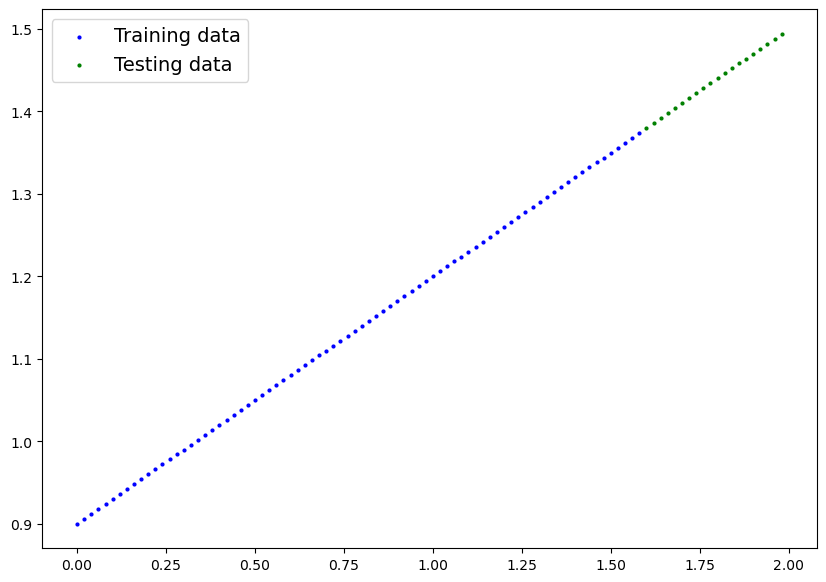

In [94]:
plot_predictions()

In [95]:
# Create a linear regression model with nn.Module subclass

class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                dtype=torch.float), 
                                   requires_grad=True) 

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float), 
                                requires_grad=True) 

    
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias 
    

In [96]:
torch.seed = 44

Model_A = LinearRegressionModel()

Model_A.state_dict()

OrderedDict([('weights', tensor([0.8448])), ('bias', tensor([0.1268]))])

In [97]:
# Make predictions with model
with torch.inference_mode():
    y_preds = Model_A(X_test)



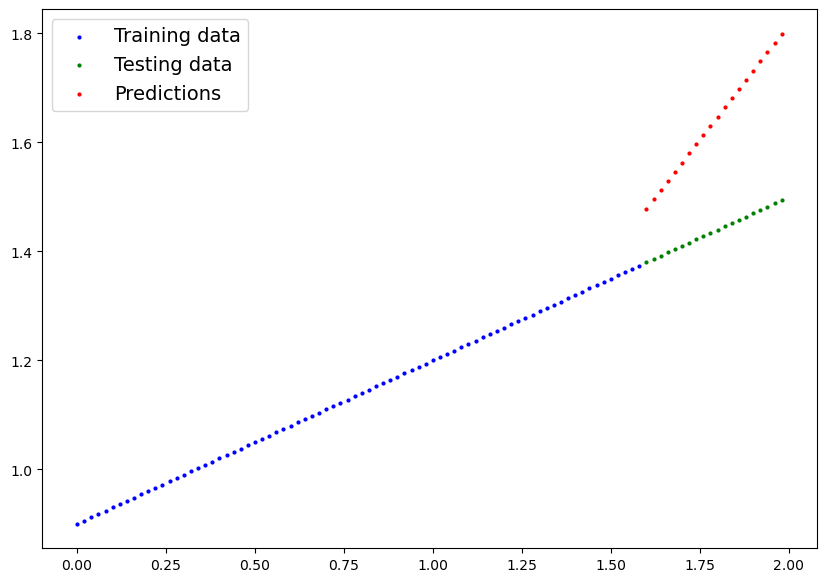

In [98]:
plot_predictions(predictions=y_preds)

In [99]:
y_test - y_preds

tensor([[-0.0984],
        [-0.1093],
        [-0.1202],
        [-0.1311],
        [-0.1420],
        [-0.1529],
        [-0.1638],
        [-0.1747],
        [-0.1856],
        [-0.1965],
        [-0.2074],
        [-0.2183],
        [-0.2292],
        [-0.2401],
        [-0.2510],
        [-0.2619],
        [-0.2728],
        [-0.2837],
        [-0.2946],
        [-0.3055]])

In [100]:
#Create loss function and optimise model patameters using nn.LlLoss
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=Model_A.parameters(), # parameters of target model to optimize
                            lr=0.01, weight_decay=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [101]:
torch.manual_seed(44)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 400

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    Model_A.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = Model_A(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    Model_A.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = Model_A(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.35272398591041565 | MAE Test Loss: 0.2176344394683838 
Epoch: 20 | MAE Train Loss: 0.27513983845710754 | MAE Test Loss: 0.386809766292572 
Epoch: 40 | MAE Train Loss: 0.248091459274292 | MAE Test Loss: 0.42880067229270935 
Epoch: 60 | MAE Train Loss: 0.22805917263031006 | MAE Test Loss: 0.4255167841911316 
Epoch: 80 | MAE Train Loss: 0.2093546837568283 | MAE Test Loss: 0.4020686745643616 
Epoch: 100 | MAE Train Loss: 0.19095145165920258 | MAE Test Loss: 0.37110400199890137 
Epoch: 120 | MAE Train Loss: 0.17258499562740326 | MAE Test Loss: 0.34020113945007324 
Epoch: 140 | MAE Train Loss: 0.15430963039398193 | MAE Test Loss: 0.304607093334198 
Epoch: 160 | MAE Train Loss: 0.13607847690582275 | MAE Test Loss: 0.26840564608573914 
Epoch: 180 | MAE Train Loss: 0.11788375675678253 | MAE Test Loss: 0.23227667808532715 
Epoch: 200 | MAE Train Loss: 0.09972541034221649 | MAE Test Loss: 0.19622007012367249 
Epoch: 220 | MAE Train Loss: 0.08160334825515747 | MAE Test

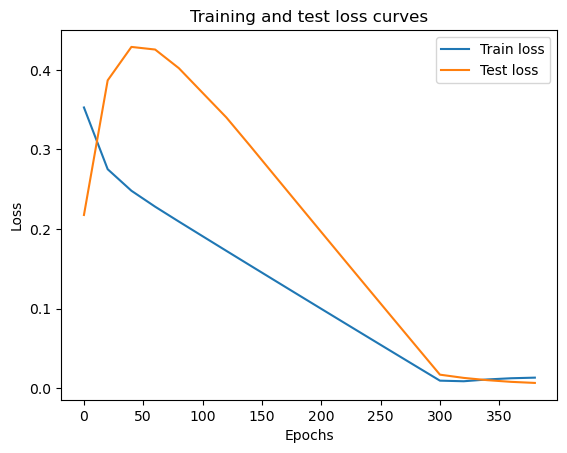

In [102]:
#Visualise the loss curves

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
''''''''''Initially, the model is learning rapidly, leading to a sharp decline in training loss.
Around 300 epochs, the training loss stabilizes, indicating that the model is no longer making significant improvements.
This plateau suggests that the optimizer has converged, and further training might not significantly improve performance.
The initial increase in test loss suggests that the model might be adapting too much to the training data early on.
After a certain point, the effect of L2 regularization kicks in, preventing overfitting, and the test loss starts to decline.
Around 300 epochs, the test loss also stabilizes.L2 regularization is effectively preventing overfitting, allowing the model to generalize better.
Your training data may contain some noise, making the training loss slightly higher than the test loss at this stage.''''''''''''''''''''''''''

In [103]:
#The model's learned parameters

# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(Model_A.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.2953]), 'bias': tensor([0.8899])})

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [104]:
#Make predictions


Model_A.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  
  y_preds = Model_A(X_test)
y_preds

tensor([[1.3625],
        [1.3684],
        [1.3743],
        [1.3802],
        [1.3861],
        [1.3920],
        [1.3979],
        [1.4038],
        [1.4097],
        [1.4156],
        [1.4215],
        [1.4274],
        [1.4333],
        [1.4392],
        [1.4451],
        [1.4511],
        [1.4570],
        [1.4629],
        [1.4688],
        [1.4747]])

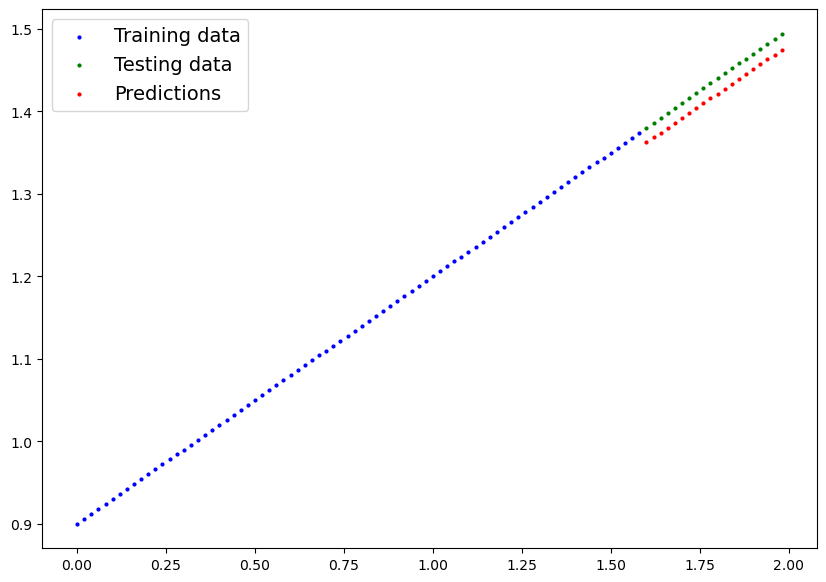

In [105]:
plot_predictions(predictions=y_preds)

In [ ]:
#The model with epochs set at 400, shows that at 340 epochs there are no significant gains, 


In [107]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=Model_A.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [108]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--  1 samsonbobo  staff  1680 Feb 12 19:22 models/01_pytorch_workflow_model_0.pth


In [109]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [110]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [111]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])